<a href="https://colab.research.google.com/github/NadiaLayraAziza/Skripsi_Nadia_2023/blob/main/Skripsi_Nadia_Progres_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from skimage import color
from skimage import io
import skimage.measure
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline
import os
import re

In [3]:
## Function to plot multiple images
def plot_img(images, titles):
  fig, axs = plt.subplots(nrows = 1, ncols = len(images), figsize = (15, 15))
  for i, p in enumerate(images):
    axs[i].imshow(p, 'gray')
    axs[i].set_title(titles[i])
    #axs[i].axis('off')
  plt.show()

Loop: 5.858421325683594 ms


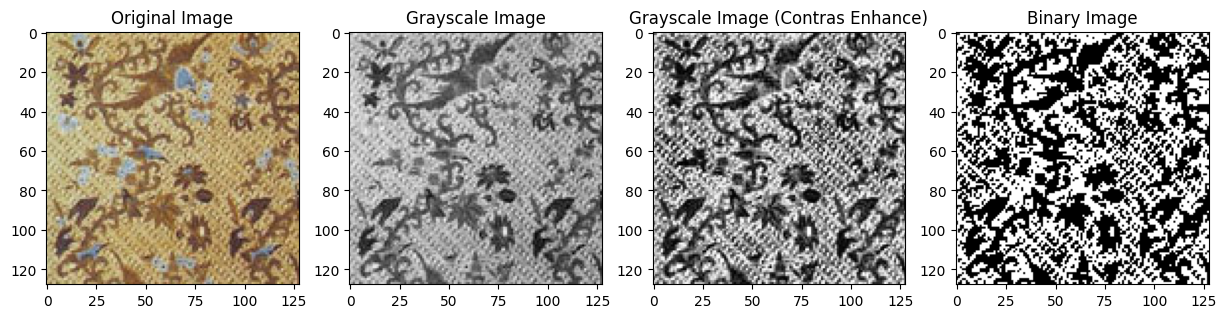

In [4]:
# Import the image in grayscale
img = cv2.imread("/content/drive/MyDrive/SKRIPSI/Dataset/Bali/B29_1.jpg")
image_ori = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## Grayscale with matrix multiply
ts = time.time()
w = np.array([[[ 0.1141, 0.5870, 0.2989]]])
grayscale = cv2.convertScaleAbs(np.sum(img*w, axis=2))
t = (time.time() -ts)
print("Loop: {:} ms".format(t*1000))

# Contras Enhance for grayscale
gray_img_eqhist = cv2.equalizeHist(grayscale)
clahe=cv2.createCLAHE(clipLimit=40)
gray_img_clahe=clahe.apply(gray_img_eqhist)

# Binary with Otsu's thresholding
ret,img_otsu_binary = cv2.threshold(gray_img_clahe,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Plot the images
images = [image_ori, grayscale, gray_img_clahe, img_otsu_binary]
titles = ['Original Image', 'Grayscale Image', 'Grayscale Image (Contras Enhance)', 'Binary Image']
plot_img(images, titles)

In [5]:
import struct

def float_to_bin(num):
    return format(struct.unpack('!I', struct.pack('!f', num))[0], '032b')

In [6]:
# -------------------- Utility function ------------------------
def normalize_label(str_):
    str_ = str_.replace(" ", "")
    str_ = str_.translate(str_.maketrans("","", "()"))
    str_ = str_.split("_")
    return ''.join(str_[:2])

def normalize_desc(folder, sub_folder):
    text = folder + " - " + sub_folder 
    text = re.sub(r'\d+', '', text)
    text = text.replace(".", "")
    text = text.strip()
    return text

def print_progress(val, val_len, folder, sub_folder, filename, bar_size=10):
    progr = "#"*round((val)*bar_size/val_len) + " "*round((val_len - (val))*bar_size/val_len)
    if val == 0:
        print("", end = "\n")
    else:
        print("[%s] folder : %s/%s/ ----> file : %s" % (progr, folder, sub_folder, filename), end="\r")
        

# -------------------- Load Dataset ------------------------
 
dataset_dir = "/content/drive/MyDrive/SKRIPSI" 

imgs = [] #list image matrix
img_binary = [] 
val_entropy = []
moment_hu = []
moment_hu_biner = []
labels = []
descs = []
for folder in os.listdir(dataset_dir):
    for sub_folder in os.listdir(os.path.join(dataset_dir, folder)):
        sub_folder_files = os.listdir(os.path.join(dataset_dir, folder, sub_folder))
        len_sub_folder = len(sub_folder_files) - 1
        for i, filename in enumerate(sub_folder_files):
            img = cv2.imread(os.path.join(dataset_dir, folder, sub_folder, filename))
            
            # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            ## Grayscale with matrix multiply
            ts = time.time()
            w = np.array([[[ 0.1141, 0.5870, 0.2989]]])
            grayscale = cv2.convertScaleAbs(np.sum(img*w, axis=2))
            t = (time.time() -ts)
            # print("Loop: {:} ms".format(t*1000))

            # Contras Enhance for grayscale
            gray_img_eqhist = cv2.equalizeHist(grayscale)
            clahe=cv2.createCLAHE(clipLimit=40)
            gray=clahe.apply(gray_img_eqhist)

            # Menghitung Entropy
            entropy = [skimage.measure.shannon_entropy(img)] + [sub_folder]
            # entropy_bin = float_to_bin([skimage.measure.shannon_entropy(img)]) + [sub_folder]
            val_entropy.append(entropy)

            # Binary with Otsu's thresholding
            ret,img_otsu_binary = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

            hu = cv2.HuMoments(cv2.moments(img_otsu_binary))

            for i in range(0, 7):
              hu[i] = -1 * np.sign(hu[i]) * np.log10(np.abs(hu[i]))
            
            # h, w = gray.shape
            # ymin, ymax, xmin, xmax = h//3, h*2//3, w//3, w*2//3
            # crop = gray[ymin:ymax, xmin:xmax]
            
            # resize = cv2.resize(crop, (0,0), fx=0.5, fy=0.5)
            
            # imgs.append(resize)
            imgs.append(gray)
            img_binary.append(img_otsu_binary)
            labels.append(normalize_label(os.path.splitext(filename)[0]))
            descs.append(sub_folder)
            # descs.append(normalize_desc(folder, sub_folder))

            hu_biner = []
            for item in hu:
              hu_biner.append(float_to_bin(item))

            hu = hu.reshape((1, 7)).tolist()[0] + [sub_folder]
            moment_hu.append(hu)
            
            hu_biner = hu_biner + [sub_folder]
            moment_hu_biner.append(hu_biner)
            
            print_progress(i, len_sub_folder, folder, sub_folder, filename)

Grayscale Image


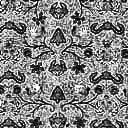

Binary Image


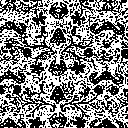

In [7]:
from google.colab.patches import cv2_imshow
print("Grayscale Image")
cv2_imshow(imgs[10])
print("Binary Image")
cv2_imshow(img_binary[10])

In [8]:
data = imgs # data image grayscale

In [9]:
def derajat0 (img):
  max = np.max(img)
  imgTmp = np.zeros([max+1, max+1])
  for i in range (len(img)):
    for j in range (len(img[i])-1):
      imgTmp[img[i,j], img[i,j+1]] += 1

  transpos = np.transpose(imgTmp)
  data = imgTmp+transpos

  tmp = 0
  for i in range (len(data)):
    for j in range (len(data)):
      tmp+=data[i,j]

  for i in range (len(data)):
    for j in range (len(data)):
      data[i,j]/=tmp
  return data

In [10]:
def derajat45 (img):
  max = np.max(img)
  imgTmp = np.zeros([max+1, max+1])
  for i in range (len(img)-1):
    for j in range (len(img[i])-1):
      imgTmp[img[i+1,j], img[i,j+1]] += 1

  transpos = np.transpose(imgTmp)
  data = imgTmp+transpos

  tmp = 0
  for i in range (len(data)):
    for j in range (len(data)):
      tmp+=data[i,j]

  for i in range (len(data)):
    for j in range (len(data)):
      data[i,j]/=tmp
  return data

In [11]:
def derajat90 (img):
  max = np.max(img)
  imgTmp = np.zeros([max+1, max+1])
  for i in range (len(img)-1):
    for j in range (len(img[i])):
      imgTmp[img[i+1,j], img[i,j]] += 1

  transpos = np.transpose(imgTmp)
  data = imgTmp+transpos

  tmp = 0
  for i in range (len(data)):
    for j in range (len(data)):
      tmp+=data[i,j]

  for i in range (len(data)):
    for j in range (len(data)):
      data[i,j]/=tmp
  return data

In [12]:
def derajat135 (img):
  max = np.max(img)
  imgTmp = np.zeros([max+1, max+1])
  for i in range (len(img)-1):
    for j in range (len(img[i])-1):
      imgTmp[img[i,j], img[i+1,j+1]] += 1

  transpos = np.transpose(imgTmp)
  data = imgTmp+transpos

  tmp = 0
  for i in range (len(data)):
    for j in range (len(data)):
      tmp+=data[i,j]

  for i in range (len(data)):
    for j in range (len(data)):
      data[i,j]/=tmp
  return data

In [13]:
from tqdm import tqdm #akses dataset
hasil = []
for i in tqdm (range (len (data)), desc='GLCM'):
# for img, label, desc in zip(imgs, labels, descs): 
  dat=[]
  dat.append(derajat0 (data[i]))
  dat.append(derajat45 (data[i]))
  dat.append(derajat90 (data[i]))
  dat.append(derajat0 (data[i]))
  hasil.append(dat)


GLCM: 100%|██████████| 300/300 [01:10<00:00,  4.25it/s]


In [14]:
import math 

def entropy (data):
  entro = 0
  for i in range (len (data)):
    for j in range (len (data)):
      if data[i,j] > 0.0:
        entro += -(data[i,j] * math.log(data[i,j]))
  return entro


In [15]:
x = ['0', '45', '90', '135']
data0 = []
data45 = []
data90 = []
data135 = []
hasilnya = []
hasilnya_bin = []

for j in tqdm (range(len(hasil)), desc="Ekstraksi"):
  da = []
  da_binary = []
  for i in hasil[j]:
    den = entropy (i)
    den_binary = float_to_bin(entropy (i))
    da.append(den)
    da_binary.append(den_binary)
  da.append(descs[j])
  da_binary.append(descs[j])
  hasilnya.append(da)
  hasilnya_bin.append(da_binary)

Ekstraksi: 100%|██████████| 300/300 [01:31<00:00,  3.27it/s]


In [16]:
namatabel = ['entropy_0', 'entropy_45', 'entropy_90', 'entropy_135', 'label']
df_ent_new = pd.DataFrame(hasilnya, columns=namatabel)
df_ent_new.shape

(300, 5)

In [17]:
df_ent_new_bin = pd.DataFrame(hasilnya_bin, columns=namatabel)
df_ent_new_bin.shape

(300, 5)

In [18]:
from skimage.feature import greycomatrix, greycoprops

# ----------------- calculate greycomatrix() & greycoprops() for angle 0, 45, 90, 135 ----------------------------------
def calc_glcm_all_agls(img, label, desc, props, dists=[1], agls=[0, np.pi/4, np.pi/2, 3*np.pi/4], lvl=256, sym=True, norm=True):
# def calc_glcm_all_agls(img, label, desc, props, dists=[1], agls=[0], lvl=256, sym=True, norm=True):
    
    glcm = greycomatrix(img, 
                        distances=dists, 
                        angles=agls, 
                        levels=lvl,
                        symmetric=sym, 
                        normed=norm)
    
    entropy = [-np.sum(glcm*np.log2(glcm + (glcm==0)))]
    # ent_props = [propery for name in props for propery in greycoprops(entropy, name)[0]]

    feature = []
    glcm_props = [propery for name in props for propery in greycoprops(glcm, name)[0]]
    for item in glcm_props:
            feature.append(item)
    feature.append(desc)
    # for ent in entropy:
    #         feature.append(ent) 
    
    return feature


# ----------------- call calc_glcm_all_agls() for all properties ----------------------------------
# properties = ['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy']
properties = ['correlation', 'homogeneity', 'contrast', 'energy']

glcm_all_agls = []
for img, label, desc in zip(imgs, labels, descs): 
    glcm_all_agls.append(
            calc_glcm_all_agls(img, 
                                label,
                                  desc, 
                                    props=properties)
                              )
 
columns = []
angles = ['0', '45', '90','135']
# angles = ['0']
for name in properties :
    for ang in angles:
        columns.append(name + "_" + ang)
        
columns.append("label")

# columns.append("entropy")

# properties_2 = ['entropy']

# for name_2 in properties_2 :
#     for ang in angles:
#         columns.append(name_2 + "_" + ang)

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

In [19]:
# Create the pandas DataFrame for GLCM features data
glcm_df_old = pd.DataFrame(glcm_all_agls, 
                      columns = columns)
# glcm_df.head()
glcm_df = pd.concat([df_ent_new.drop('label', axis=1), glcm_df_old], axis=1, join='inner')
glcm_df

,entropy_0,entropy_45,entropy_90,entropy_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,...,homogeneity_135,contrast_0,contrast_45,contrast_90,contrast_135,energy_0,energy_45,energy_90,energy_135,label
0,9.863139,9.953798,9.871703,9.863139,0.733152,0.542083,0.693222,0.548903,0.039592,0.028804,...,0.026583,2746.428888,4713.598921,3156.249692,4643.006200,0.007835,0.007396,0.007790,0.007346,Malangan
1,9.878988,9.963072,9.886394,9.878988,0.681140,0.493788,0.646760,0.480888,0.038473,0.025334,...,0.026634,3282.349286,5210.284519,3634.507874,5342.972720,0.007723,0.007324,0.007683,0.007298,Malangan
2,9.876694,9.956095,9.887447,9.876694,0.704517,0.535568,0.671416,0.508985,0.038168,0.026739,...,0.027969,3019.636380,4747.494017,3360.099040,5019.155806,0.007729,0.007302,0.007689,0.007338,Malangan
3,9.897328,9.963752,9.885782,9.897328,0.671270,0.499268,0.664181,0.485052,0.034581,0.023952,...,0.025479,3365.719304,5132.317379,3441.076464,5277.705809,0.007639,0.007261,0.007710,0.007299,Malangan
4,9.880519,9.963540,9.890993,9.880519,0.675087,0.491282,0.649778,0.472281,0.036890,0.024734,...,0.026899,3357.254798,5258.441627,3622.928273,5454.889888,0.007727,0.007292,0.007671,0.007299,Malangan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,10.018839,10.054474,10.021539,10.018839,0.329452,0.028576,0.318188,0.056954,0.024629,0.017957,...,0.016549,7131.618233,10315.861058,7248.945559,10014.558807,0.007102,0.006912,0.007116,0.006899,Cuwiri
296,10.025627,10.042216,10.025482,10.025627,0.322026,0.030452,0.307097,0.072772,0.023873,0.016303,...,0.018519,7217.798597,10321.110670,7379.962844,9871.676421,0.007052,0.006935,0.007086,0.006956,Cuwiri
297,10.002683,10.046950,10.017742,10.002683,0.390217,0.068281,0.332676,0.104148,0.027163,0.017138,...,0.016526,6471.401329,9880.531403,7079.130536,9500.700911,0.007147,0.006933,0.007125,0.006916,Cuwiri
298,10.019759,10.052183,10.023215,10.019759,0.303066,0.029918,0.318268,0.064410,0.025323,0.016402,...,0.017262,7456.970657,10380.034348,7293.388410,10011.242978,0.007090,0.006903,0.007070,0.006900,Cuwiri


In [20]:
cols = ["hu1", "hu2", "hu3", "hu4", "hu5", "hu6", "hu7", "label"]
	
mi_df = pd.DataFrame(moment_hu, columns=cols)
mi_df

# print("Extraction done!")

,hu1,hu2,hu3,hu4,hu5,hu6,hu7,label
0,2.871790,10.532270,12.393055,12.748444,-26.002743,-18.333662,-25.328725,Malangan
1,2.886285,9.902556,12.014810,13.345903,-26.382192,18.352853,26.073132,Malangan
2,2.876979,10.139924,12.743230,13.981773,-27.351822,19.137403,-28.077501,Malangan
3,2.886469,9.946347,11.753544,13.401661,-26.125455,-18.375893,-26.134190,Malangan
4,2.881999,9.506998,12.629859,13.733444,27.945704,20.099347,26.916990,Malangan
...,...,...,...,...,...,...,...,...
295,2.893035,10.314000,12.394841,13.624988,27.423078,-18.816364,-26.640740,Cuwiri
296,2.890298,9.679791,12.513052,13.445458,26.545653,-18.545883,-26.609476,Cuwiri
297,2.890555,10.304843,13.316913,13.143726,-27.010107,19.495120,-26.385971,Cuwiri
298,2.888672,11.279638,13.213764,13.620044,-27.065519,-19.283827,27.491486,Cuwiri


In [21]:
# ----------------- calculate greycomatrix() & greycoprops() for angle 0, 45, 90, 135 ----------------------------------
def calc_glcm_all_agls_biner(img, label, desc, props, dists=[1], agls=[0, np.pi/4, np.pi/2, 3*np.pi/4], lvl=256, sym=True, norm=True):
# def calc_glcm_all_agls(img, label, desc, props, dists=[1], agls=[0], lvl=256, sym=True, norm=True):
    
    glcm = greycomatrix(img, 
                        distances=dists, 
                        angles=agls, 
                        levels=lvl,
                        symmetric=sym, 
                        normed=norm)
    
    feature_biner = []
    glcm_props = [propery for name in props for propery in greycoprops(glcm, name)[0]]
    for item in glcm_props:
            feature_biner.append(float_to_bin(item))
    feature_biner.append(desc) 
    
    return feature_biner


# ----------------- call calc_glcm_all_agls() for all properties ----------------------------------
# properties = ['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy']
properties = ['correlation', 'homogeneity', 'contrast', 'energy']

glcm_all_agls_biner = []
for img, label, desc in zip(imgs, labels, descs): 
    glcm_all_agls_biner.append(
            calc_glcm_all_agls_biner(img, 
                                label,
                                  desc, 
                                    props=properties)
                              )
    

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

In [22]:
# Create the pandas DataFrame for GLCM features data
glcm_df_biner_old = pd.DataFrame(glcm_all_agls_biner, 
                      columns = columns)
# glcm_df.head()
glcm_df_biner = pd.concat([df_ent_new_bin.drop('label', axis=1), glcm_df_biner_old], axis=1, join='inner')
glcm_df_biner

,entropy_0,entropy_45,entropy_90,entropy_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,...,homogeneity_135,contrast_0,contrast_45,contrast_90,contrast_135,energy_0,energy_45,energy_90,energy_135,label
0,01000001000111011100111101101011,01000001000111110100001011000001,01000001000111011111001001111111,01000001000111011100111101101011,00111111001110111010111111100000,00111111000010101100010111101100,00111111001100010111011011111010,00111111000011001000010011100111,00111101001000100010101100010111,00111100111010111111011011010000,...,00111100110110011100010000001111,01000101001010111010011011011101,01000101100100110100110011001011,01000101010001010100001111111111,01000101100100010001100000001101,00111100000000000110000001011100,00111011111100100101110000001110,00111011111111110100000111000100,00111011111100001011100000011000,Malangan
1,01000001000111100001000001010101,01000001000111110110100010111111,01000001000111100010111010101011,01000001000111100001000001010101,00111111001011100101111100111000,00111110111111001101000110111100,00111111001001011001001000001100,00111110111101100011011100000100,00111101000111011001011000011011,00111100110011111000100101000100,...,00111100110110100010111010100110,01000101010011010010010110010111,01000101101000101101001001000111,01000101011000110010100000100000,01000101101001101111011111001000,00111011111111010001010100110000,00111011111011111111110000101000,00111011111110111100001101001000,00111011111011110010010100100011,Malangan
2,01000001000111100000011011110000,01000001000111110100110000101010,01000001000111100011001011111100,01000001000111100000011011110000,00111111001101000101101100110111,00111111000010010001101100000000,00111111001010111110000111110010,00111111000000100100110011011110,00111101000111000101011010000011,00111100110110110000101010110101,...,00111100111001010001111100001000,01000101001111001011101000101111,01000101100101000101101111110100,01000101010100100000000110010110,01000101100111001101100100111111,00111011111111010100000101011011,00111011111011110100100001111001,00111011111110111111010011010111,00111011111100000111011101010001,Malangan
3,01000001000111100101101101110101,01000001000111110110101110000111,01000001000111100010110000101010,01000001000111100101101101110101,00111111001010111101100001010101,00111110111111111010000000011000,00111111001010100000011111000010,00111110111110000101100011001010,00111101000011011010010001101100,00111100110001000011011111101100,...,00111100110100001011100111011000,01000101010100100101101110000010,01000101101000000110001010001010,01000101010101110001000100111001,01000101101001001110110110100101,00111011111110100101000101111001,00111011111011011110101010100000,00111011111111001010000011111001,00111011111011110010110011011111,Malangan
4,01000001000111100001011010011011,01000001000111110110101010101001,01000001000111100100000110000010,01000001000111100001011010011011,00111111001011001101001001111100,00111110111110111000100101011010,00111111001001100101011111011001,00111110111100011100111011001100,00111101000101110001101000110111,00111100110010101001111001000100,...,00111100110111000101101010101100,01000101010100011101010000010100,01000101101001000101001110001000,01000101011000100110111011011010,01000101101010100111011100011110,00111011111111010010111011011111,00111011111011101111001001001110,00111011111110110101110111111010,00111011111011110010100110001110,Malangan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,01000001001000000100110100101010,01000001001000001101111100100000,01000001001000000101100000111001,01000001001000000100110100101010,00111110101010001010110111011111,00111100111010100001100011011111,00111110101000101110100101111111,00111101011010010100100100011010,00111100110010011100001010110110,00111100100100110001101011100111,...,00111100100001111001000111100110,01000101110111101101110011110010,01000110001000010010111101110010,01000101111000101

In [23]:
mi_df_biner = pd.DataFrame(moment_hu_biner, columns=cols)
mi_df_biner

# print("Extraction done!")

,hu1,hu2,hu3,hu4,hu5,hu6,hu7,label
0,01000000001101111100101101100111,01000001001010001000010000101110,01000001010001100100100111110100,01000001010010111111100110100000,11000001110100000000010110011110,11000001100100101010101101010111,11000001110010101010000100111010,Malangan
1,01000000001110001011100011100100,01000001000111100111000011011110,01000001010000000011110010101001,01000001010101011000100011010010,11000001110100110000111010111011,01000001100100101101001010100101,01000001110100001001010111000110,Malangan
2,01000000001110000010000001101100,01000001001000100011110100100001,01000001010010111110010001000101,01000001010111111011010101011000,11000001110110101101000010001000,01000001100110010001100101100111,11000001111000001001111010111001,Malangan
3,01000000001110001011101111101010,01000001000111110010010000111100,01000001001111000000111010000101,01000001010101100110110100110100,11000001110100010000000011101111,11000001100100110000000111010100,11000001110100010001001011010010,Malangan
4,01000000001110000111001010101010,01000001000110000001110010101010,01000001010010100001001111100111,01000001010110111011110000110000,01000001110111111001000011001101,01000001101000001100101101110110,01000001110101110101010111111111,Malangan
...,...,...,...,...,...,...,...,...
295,01000000001110010010011101111101,01000001001001010000011000100101,01000001010001100101000101000100,01000001010110011111111111110100,01000001110110110110001001110110,11000001100101101000011111101010,11000001110101010010000000111101,Cuwiri
296,01000000001110001111101010100110,01000001000110101110000001101101,01000001010010000011010101110110,01000001010101110010000010011001,01000001110101000101110101111111,11000001100101000101110111111000,11000001110101001110000000110101,Cuwiri
297,01000000001110001111111011011001,01000001001001001110000010100011,01000001010101010001001000010011,01000001010100100100110010110011,11000001110110000001010010110011,01000001100110111111011000000010,11000001110100110001011001111000,Cuwiri
298,01000000001110001101111111111111,01000001001101000111100101100101,01000001010100110110101110010100,01000001010110011110101110110011,11000001110110001000011000101111,11000001100110100100010101000111,01000001110110111110111010010000,Cuwiri


In [24]:
_xormap = {('0', '1'): '1', ('1', '0'): '1', ('1', '1'): '0', ('0', '0'): '0'}
def xor(x, y):
  result = ''.join([_xormap[a, b] for a, b in zip(x, y)])
  return result
    # return ''.join([_xormap[a, b] for a, b in zip(x, y)])

In [25]:
xor_glcm = []
for index, row in glcm_df_biner.iterrows():
  x1 = xor(row['entropy_0'], row['entropy_45'])
  x2 = xor(x1, row['entropy_90'])
  x3 = xor(x2, row['entropy_135'])
  x4 = xor(x3, row['correlation_0'])
  x5 = xor(x4, row['correlation_45'])
  x6 = xor(x5, row['correlation_90'])
  x7 = xor(x6, row['correlation_135'])
  x8 = xor(x7, row['homogeneity_0'])
  x9 = xor(x8, row['homogeneity_45'])
  x10 = xor(x9, row['homogeneity_90'])
  x11 = xor(x10, row['homogeneity_135'])
  x12 = xor(x11, row['contrast_0'])
  x13 = xor(x12, row['contrast_45'])
  x14 = xor(x13, row['contrast_90'])
  x15 = xor(x14, row['contrast_135'])
  x16 = xor(x11, row['energy_0'])
  x17 = xor(x12, row['energy_45'])
  x18 = xor(x13, row['energy_90'])
  x19 = xor(x14, row['energy_135'])
  xor_glcm.append(x19)
# xor_glcm.append(label_xor)
# xor_glcm.append(descs)

In [26]:
col_xor_glcm = ['xor_glcm']
df_xor_glcm = pd.DataFrame(xor_glcm, columns=col_xor_glcm)
df_xor_glcm['label'] = descs
df_xor_glcm
# descs

,xor_glcm,label
0,01111110001110000010010110110101,Malangan
1,01111110011111001011000010111100,Malangan
2,01111110001001000111011111101111,Malangan
3,01111110011111000100111001100001,Malangan
4,01111110010110010001011111111111,Malangan
...,...,...
295,01111100011011010000111010101111,Cuwiri
296,01111100100101001111100101000000,Cuwiri
297,01111101110100101111000001010011,Cuwiri
298,01111100100010111010110111100011,Cuwiri


In [27]:
xor_mi = []
for index, row in mi_df_biner.iterrows():
  y1 = xor(row['hu1'], row['hu2'])
  y2 = xor(y1, row['hu3'])
  y3 = xor(y2, row['hu4'])
  y4 = xor(y3, row['hu5'])
  y5 = xor(y4, row['hu6'])
  y6 = xor(y5, row['hu7'])
  xor_mi.append(y6)
# xor_glcm.append(descs)

In [28]:
col_xor_mi = ['xor_mi']
df_xor_mi = pd.DataFrame(xor_mi, columns=col_xor_mi)
df_xor_mi['label'] = descs
df_xor_mi
# xor_glcm

,xor_mi,label
0,11000000100110101111000011101110,Malangan
1,11000000101000100011010110011001,Malangan
2,01000000101011010001101100000110,Malangan
3,11000000110111101110111110001110,Malangan
4,01000000100110011100111110010011,Malangan
...,...,...
295,01000000100110110100101001001001,Cuwiri
296,01000000101010011110111110010110,Cuwiri
297,01000000100010111011010000010011,Cuwiri
298,01000000100111110000101101000101,Cuwiri


In [29]:
glcm_mi_df = pd.concat([df_xor_glcm.drop('label', axis=1), df_xor_mi], axis=1, join='inner')
glcm_mi_df

,xor_glcm,xor_mi,label
0,01111110001110000010010110110101,11000000100110101111000011101110,Malangan
1,01111110011111001011000010111100,11000000101000100011010110011001,Malangan
2,01111110001001000111011111101111,01000000101011010001101100000110,Malangan
3,01111110011111000100111001100001,11000000110111101110111110001110,Malangan
4,01111110010110010001011111111111,01000000100110011100111110010011,Malangan
...,...,...,...
295,01111100011011010000111010101111,01000000100110110100101001001001,Cuwiri
296,01111100100101001111100101000000,01000000101010011110111110010110,Cuwiri
297,01111101110100101111000001010011,01000000100010111011010000010011,Cuwiri
298,01111100100010111010110111100011,01000000100111110000101101000101,Cuwiri


In [30]:
# Information Fusion GLCM & MI 
xor_glcm_mi = []
for index, row in glcm_mi_df.iterrows():
  xor1 = xor(row['xor_glcm'], row['xor_mi'])
  xor_glcm_mi.append(xor1)

In [31]:
col_xor_glcm_mi = ['xor_glcm_mi']
df_xor_glcm_mi = pd.DataFrame(xor_glcm_mi, columns=col_xor_glcm_mi)
df_xor_glcm_mi['label'] = descs
df_xor_glcm_mi

,xor_glcm_mi,label
0,10111110101000101101010101011011,Malangan
1,10111110110111101000010100100101,Malangan
2,00111110100010010110110011101001,Malangan
3,10111110101000101010000111101111,Malangan
4,00111110110000001101100001101100,Malangan
...,...,...
295,00111100111101100100010011100110,Cuwiri
296,00111100001111010001011011010110,Cuwiri
297,00111101010110010100010001000000,Cuwiri
298,00111100000101001010011010100110,Cuwiri


**PROSES KLASIFIKASI GLCM + SVM**

In [189]:
# PROSES KLASIFIKASI SVM + GLCM

X = glcm_df.drop('label', axis=1)
y = glcm_df['label']

# The training and test set data splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(240, 20)
(60, 20)


In [190]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [70]:
# param_grid = {
#     'C': [0.1, 1, 10, 100], 
#     'gamma': [0.001, 0.01, 0.1, 1, 10],
#     'kernel': ['rbf']
# }

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC # import SVC model

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['rbf']
}

# Create a grid search object
grid = GridSearchCV(estimator=SVC(), param_grid=param_grid, refit=True, verbose=1)

# Fit the grid search object to the training data
grid.fit(X_train, y_train)

# Get the best parameters
best_params = grid.best_params_

print(best_params)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [204]:
# Fitting the Kernel SVM to the training set
# training the kernel SVM model
from sklearn.svm import SVC # import SVC model
classifier = SVC(kernel = 'rbf', C=100, gamma=10, probability=True) # creat model's object
classifier.fit(X_train, y_train) # fits the model to the training data

SVC(C=100, gamma=10, probability=True)

In [201]:
# predicting the test set
y_predict_train = classifier.predict(X_train) 
y_predict_test = classifier.predict(X_test)
# print(y_predict_test)

In [193]:
# Evaluating the model performance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# con_matrx = confusion_matrix(yTest, y_predict)
# print(con_matrx)
print('Accuracy Training:', accuracy_score(y_train, y_predict_train))
# Tambahan report
print(classification_report(y_train, y_predict_train)) 
print('Accuracy Testing:', accuracy_score(y_test, y_predict_test))
# Tambahan report
print(classification_report(y_test, y_predict_test)) 

Accuracy Training: 0.225
                     precision    recall  f1-score   support

               Bali       0.00      0.00      0.00        11
        Cendrawasih       0.00      0.00      0.00         4
             Ceplok       0.00      0.00      0.00         6
             Cuwiri       0.00      0.00      0.00         9
              Lasem       0.00      0.00      0.00         9
           Malangan       0.00      0.00      0.00         9
              Nitik       0.00      0.00      0.00         5
Pakis Mangkunegaran       0.00      0.00      0.00         4
             Parang       0.23      1.00      0.37        54
        Sekar Jagad       0.00      0.00      0.00         5
              Semen       0.00      0.00      0.00         5
          Sido Asih       0.00      0.00      0.00         9
          Sidoluhur       0.00      0.00      0.00         5
          Sidomukti       0.00      0.00      0.00         5
         Sogan Solo       0.00      0.00      0.00        1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [207]:
from sklearn.model_selection import cross_val_score, KFold
kf=KFold(n_splits=8)
score=cross_val_score(classifier, X_train, y_train, cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))
print("Average Cross Validation score (dibulatkan) :{}".format(round(score.mean(),3)))

Cross Validation Scores are [0.2        0.3        0.26666667 0.33333333 0.3        0.26666667
 0.26666667 0.23333333]
Average Cross Validation score :0.27083333333333337
Average Cross Validation score (dibulatkan) :0.271


**PROSES KLASIFIKASI MI + SVM**

In [232]:
# PROSES KLASIFIKASI SVM + MI

X = mi_df.drop('label', axis=1)
y = mi_df['label']

# The training and test set data splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(240, 7)
(60, 7)


In [233]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
# param_grid = {
#     'C': [0.1, 1, 10, 100], 
#     'gamma': [0.001, 0.01, 0.1, 1, 10],
#     'kernel': ['rbf']
# }

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC # import SVC model

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['rbf']
}

# Create a grid search object
grid = GridSearchCV(estimator=SVC(), param_grid=param_grid, refit=True, verbose=1)

# Fit the grid search object to the training data
grid.fit(X_train, y_train)

# Get the best parameters
best_params = grid.best_params_

print(best_params)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [277]:
# Fitting the Kernel SVM to the training set
# training the kernel SVM model
from sklearn.svm import SVC # import SVC model
classifier = SVC(kernel = 'rbf', C=100, gamma=10, probability=True) # creat model's object
classifier.fit(X_train, y_train) # fits the model to the training data

SVC(C=100, gamma=10, probability=True)

In [235]:
# predicting the test set
y_predict_train = classifier.predict(X_train) 
y_predict_test = classifier.predict(X_test)
# print(y_predict_test)

In [236]:
# Evaluating the model performance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# con_matrx = confusion_matrix(yTest, y_predict)
# print(con_matrx)
print('Accuracy Training:', accuracy_score(y_train, y_predict_train))
# Tambahan report
print(classification_report(y_train, y_predict_train)) 
print('Accuracy Testing:', accuracy_score(y_test, y_predict_test))
# Tambahan report
print(classification_report(y_test, y_predict_test))

Accuracy Training: 0.35833333333333334
                     precision    recall  f1-score   support

               Bali       0.00      0.00      0.00        11
        Cendrawasih       0.00      0.00      0.00         4
             Ceplok       0.00      0.00      0.00         6
             Cuwiri       1.00      0.11      0.20         9
              Lasem       0.33      0.22      0.27         9
           Malangan       0.00      0.00      0.00         9
              Nitik       1.00      0.20      0.33         5
Pakis Mangkunegaran       0.00      0.00      0.00         4
             Parang       0.43      0.80      0.55        54
        Sekar Jagad       0.00      0.00      0.00         5
              Semen       1.00      0.20      0.33         5
          Sido Asih       0.00      0.00      0.00         9
          Sidoluhur       0.00      0.00      0.00         5
          Sidomukti       0.00      0.00      0.00         5
         Sogan Solo       0.00      0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [279]:
from sklearn.model_selection import cross_val_score, KFold
kf=KFold(n_splits=12)
score=cross_val_score(classifier, X_train, y_train, cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))
print("Average Cross Validation score (dibulatkan) :{}".format(round(score.mean(),3)))

Cross Validation Scores are [0.2  0.2  0.15 0.3  0.15 0.25 0.2  0.3  0.25 0.25 0.1  0.25]
Average Cross Validation score :0.21666666666666667
Average Cross Validation score (dibulatkan) :0.217


**PROSES KLASIFIKASI GLCM + MI + SVM (2 input)**

In [280]:
# PROSES KLASIFIKASI GLCM + MI + SVM (2 input)

X = glcm_mi_df.drop('label', axis=1)
y = glcm_mi_df['label']

# The training and test set data splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(240, 2)
(60, 2)


In [281]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [48]:
# param_grid = {
#     'C': [0.1, 1, 10, 100], 
#     'gamma': [0.001, 0.01, 0.1, 1, 10],
#     'kernel': ['rbf']
# }

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC # import SVC model

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['rbf']
}

# Create a grid search object
grid = GridSearchCV(estimator=SVC(), param_grid=param_grid, refit=True, verbose=1)

# Fit the grid search object to the training data
grid.fit(X_train, y_train)

# Get the best parameters
best_params = grid.best_params_

print(best_params)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}


In [344]:
# Fitting the Kernel SVM to the training set
# training the kernel SVM model
from sklearn.svm import SVC # import SVC model
classifier = SVC(kernel = 'rbf', C=100, gamma=10, probability=True) # creat model's object
classifier.fit(X_train, y_train) # fits the model to the training data

SVC(C=100, gamma=10, probability=True)

In [283]:
# predicting the test set
y_predict_train = classifier.predict(X_train) 
y_predict_test = classifier.predict(X_test)
# print(y_predict_test)

In [284]:
# Evaluating the model performance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# con_matrx = confusion_matrix(yTest, y_predict)
# print(con_matrx)
print('Accuracy Training:', accuracy_score(y_train, y_predict_train))
# Tambahan report
print(classification_report(y_train, y_predict_train)) 
print('Accuracy Testing:', accuracy_score(y_test, y_predict_test))
# Tambahan report
print(classification_report(y_test, y_predict_test))

Accuracy Training: 0.225
                     precision    recall  f1-score   support

               Bali       0.00      0.00      0.00        11
        Cendrawasih       0.00      0.00      0.00         4
             Ceplok       0.00      0.00      0.00         6
             Cuwiri       0.00      0.00      0.00         9
              Lasem       0.00      0.00      0.00         9
           Malangan       0.00      0.00      0.00         9
              Nitik       0.00      0.00      0.00         5
Pakis Mangkunegaran       0.00      0.00      0.00         4
             Parang       0.23      1.00      0.37        54
        Sekar Jagad       0.00      0.00      0.00         5
              Semen       0.00      0.00      0.00         5
          Sido Asih       0.00      0.00      0.00         9
          Sidoluhur       0.00      0.00      0.00         5
          Sidomukti       0.00      0.00      0.00         5
         Sogan Solo       0.00      0.00      0.00        1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [346]:
from sklearn.model_selection import cross_val_score, KFold
kf=KFold(n_splits=8)
score=cross_val_score(classifier, X_train, y_train, cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))
print("Average Cross Validation score (dibulatkan) :{}".format(round(score.mean(),3)))

Cross Validation Scores are [0.13333333 0.16666667 0.26666667 0.26666667 0.23333333 0.26666667
 0.16666667 0.3       ]
Average Cross Validation score :0.22499999999999998
Average Cross Validation score (dibulatkan) :0.225


**PROSES KLASIFIKASI GLCM + MI + SVM (1 input)**

In [347]:
# PROSES KLASIFIKASI GLCM + MI + SVM (1 input)

X = df_xor_glcm_mi.drop('label', axis=1)
y = df_xor_glcm_mi['label']

# The training and test set data splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(240, 1)
(60, 1)


In [348]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [55]:
# param_grid = {
#     'C': [0.1, 1, 10, 100], 
#     'gamma': [0.001, 0.01, 0.1, 1, 10],
#     'kernel': ['rbf']
# }

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC # import SVC model

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['rbf']
}

# Create a grid search object
grid = GridSearchCV(estimator=SVC(), param_grid=param_grid, refit=True, verbose=1)

# Fit the grid search object to the training data
grid.fit(X_train, y_train)

# Get the best parameters
best_params = grid.best_params_

print(best_params)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}


In [410]:
# Fitting the Kernel SVM to the training set
# training the kernel SVM model
from sklearn.svm import SVC # import SVC model
classifier = SVC(kernel = 'rbf', C=100, gamma=10, probability=True) # creat model's object
classifier.fit(X_train, y_train) # fits the model to the training data

SVC(C=100, gamma=10, probability=True)

In [350]:
# predicting the test set
y_predict_train = classifier.predict(X_train) 
y_predict_test = classifier.predict(X_test)
# print(y_predict_test)

In [351]:
# Evaluating the model performance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# con_matrx = confusion_matrix(yTest, y_predict)
# print(con_matrx)
print('Accuracy Training:', accuracy_score(y_train, y_predict_train))
# Tambahan report
print(classification_report(y_train, y_predict_train)) 
print('Accuracy Testing:', accuracy_score(y_test, y_predict_test))
# Tambahan report
print(classification_report(y_test, y_predict_test))

Accuracy Training: 0.225
                     precision    recall  f1-score   support

               Bali       0.00      0.00      0.00        11
        Cendrawasih       0.00      0.00      0.00         4
             Ceplok       0.00      0.00      0.00         6
             Cuwiri       0.00      0.00      0.00         9
              Lasem       0.00      0.00      0.00         9
           Malangan       0.00      0.00      0.00         9
              Nitik       0.00      0.00      0.00         5
Pakis Mangkunegaran       0.00      0.00      0.00         4
             Parang       0.23      1.00      0.37        54
        Sekar Jagad       0.00      0.00      0.00         5
              Semen       0.00      0.00      0.00         5
          Sido Asih       0.00      0.00      0.00         9
          Sidoluhur       0.00      0.00      0.00         5
          Sidomukti       0.00      0.00      0.00         5
         Sogan Solo       0.00      0.00      0.00        1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [412]:
from sklearn.model_selection import cross_val_score, KFold
kf=KFold(n_splits=12)
score=cross_val_score(classifier, X_train, y_train, cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))
print("Average Cross Validation score (dibulatkan) :{}".format(round(score.mean(),3)))

Cross Validation Scores are [0.15 0.2  0.1  0.4  0.   0.4  0.2  0.25 0.25 0.25 0.1  0.3 ]
Average Cross Validation score :0.21666666666666667
Average Cross Validation score (dibulatkan) :0.217


**Tanpa Information Fusion**

In [413]:
glcm_mi_df_no_if = pd.concat([glcm_df.drop('label', axis=1), mi_df], axis=1, join='inner')
# glcm_mi_df_no_if

In [414]:
# PROSES KLASIFIKASI SVM + GLCM + MI (Tanpa Information Fusion)

X = glcm_mi_df_no_if.drop('label', axis=1)
y = glcm_mi_df_no_if['label']

# The training and test set data splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(240, 27)
(60, 27)


In [415]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [416]:
# param_grid = {
#     'C': [0.1, 1, 10, 100], 
#     'gamma': [0.001, 0.01, 0.1, 1, 10],
#     'kernel': ['rbf']
# }

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC # import SVC model

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['rbf']
}

# Create a grid search object
grid = GridSearchCV(estimator=SVC(), param_grid=param_grid, refit=True, verbose=1)

# Fit the grid search object to the training data
grid.fit(X_train, y_train)

# Get the best parameters
best_params = grid.best_params_

print(best_params)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [479]:
# Fitting the Kernel SVM to the training set
# training the kernel SVM model
from sklearn.svm import SVC # import SVC model
classifier = SVC(kernel = 'rbf', C=100, gamma=10, probability=True) # creat model's object
classifier.fit(X_train, y_train) # fits the model to the training data

SVC(C=100, gamma=10, probability=True)

In [418]:
# predicting the test set
y_predict_train = classifier.predict(X_train) 
y_predict_test = classifier.predict(X_test)
# print(y_predict_test)

In [419]:
# Evaluating the model performance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# con_matrx = confusion_matrix(yTest, y_predict)
# print(con_matrx)
print('Accuracy Training:', accuracy_score(y_train, y_predict_train))
# Tambahan report
print(classification_report(y_train, y_predict_train)) 
print('Accuracy Testing:', accuracy_score(y_test, y_predict_test))
# Tambahan report
print(classification_report(y_test, y_predict_test))

Accuracy Training: 1.0
                     precision    recall  f1-score   support

               Bali       1.00      1.00      1.00        11
        Cendrawasih       1.00      1.00      1.00         4
             Ceplok       1.00      1.00      1.00         6
             Cuwiri       1.00      1.00      1.00         9
              Lasem       1.00      1.00      1.00         9
           Malangan       1.00      1.00      1.00         9
              Nitik       1.00      1.00      1.00         5
Pakis Mangkunegaran       1.00      1.00      1.00         4
             Parang       1.00      1.00      1.00        54
        Sekar Jagad       1.00      1.00      1.00         5
              Semen       1.00      1.00      1.00         5
          Sido Asih       1.00      1.00      1.00         9
          Sidoluhur       1.00      1.00      1.00         5
          Sidomukti       1.00      1.00      1.00         5
         Sogan Solo       1.00      1.00      1.00        13


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [481]:
from sklearn.model_selection import cross_val_score, KFold
kf=KFold(n_splits=12)
score=cross_val_score(classifier, X_train, y_train, cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))
print("Average Cross Validation score (dibulatkan) :{}".format(round(score.mean(),3)))

Cross Validation Scores are [0.2  0.2  0.15 0.3  0.15 0.3  0.25 0.3  0.25 0.25 0.1  0.25]
Average Cross Validation score :0.225
Average Cross Validation score (dibulatkan) :0.225
